 # Autoencoders: 
 In this task, you’ll build and train autoencoder models using the Fashion-MNIST dataset (think shoes, shirts, and bags instead of digits). Set the hidden (latent) dimension to 16 and 48.

# pending task
  -[ ] add train, test and val loss
  -[ ] plot graphs for the test and train loss
  -[ ] understand interpolation logic and test it by yourself.
  -[ ] tweak the latent variables, part . 2question and 2 part.

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data',train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data',train=False, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data',train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
# how can i get validation from the train and how can i also include the validation, 
    # validation during the training won't have any updation of the parameters.


In [122]:
class Autoencoder(nn.Module):
    def __init__(self,latent_dim=16):
        super().__init__()
        
        # how is this X going to be passed over here?
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),  # what if I add other activation functions over here and how do i decide which one to choose?
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,self.latent_dim)
        )
    
        # something from forward method needs to be given to the backward method using which it will reconstruct
        # internally how does the sequential function is going to take the input.
        self.decoder = nn.Sequential(
            nn.Linear(self.latent_dim,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        x= self.encoder(x)
        x=self.decoder(x)
        return x
    
autoencoder = Autoencoder()

In [ ]:
# criterion how is it 
loss_func = nn.MSELoss()
n_epoch = 20
lr = 1e-3
weight_decay=1e-8
outputs=[]
losses=[]
optimizer = optim.Adam(autoencoder.parameters(),lr,weight_decay=weight_decay)
for epoch in range(n_epoch):
    for data,_ in train_loader:
        #data = data.view(-1, 28 * 28) # what it does?
        data = data.view(data.size(0),-1)
        output = autoencoder(data)
        # what parameters are getting updated over here?
        loss = loss_func(output,data)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    
    outputs.append((epoch,data,output))
    print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}')
        

Epoch [1/20], Loss: 0.0556
Epoch [2/20], Loss: 0.0381
Epoch [3/20], Loss: 0.0315
Epoch [4/20], Loss: 0.0283
Epoch [5/20], Loss: 0.0293
Epoch [6/20], Loss: 0.0285
Epoch [7/20], Loss: 0.0256
Epoch [8/20], Loss: 0.0230
Epoch [9/20], Loss: 0.0224
Epoch [10/20], Loss: 0.0239
Epoch [11/20], Loss: 0.0189
Epoch [12/20], Loss: 0.0186
Epoch [13/20], Loss: 0.0196
Epoch [14/20], Loss: 0.0201
Epoch [15/20], Loss: 0.0202
Epoch [16/20], Loss: 0.0182
Epoch [17/20], Loss: 0.0169
Epoch [18/20], Loss: 0.0180
Epoch [19/20], Loss: 0.0161
Epoch [20/20], Loss: 0.0191


In [ ]:
# what optimisation techniques can go well over here?

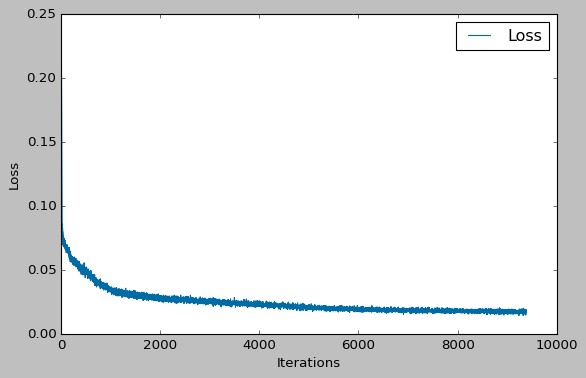

In [36]:
# correct this training and test loss code
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [124]:
# understand this part, what has happened?

def plot_ae_outputs(outputs, n=10, epochs=50):
    plt.figure(figsize=(16, 4.5))
    
    # Select epochs to visualize (evenly spaced)
    selected_epochs = list(range(0, epochs, epochs//n))
    if len(selected_epochs) < n:  # Ensure we have exactly n items
        selected_epochs.append(epochs-1)
    if len(selected_epochs) > n:  # If we have too many, trim
        selected_epochs = selected_epochs[:n]
    
    # Get outputs from the selected epochs
    selected_outputs = [outputs[i] for i in selected_epochs]
    
    for i, (epoch, img, rec_img) in enumerate(selected_outputs):
        # Plot original image
        ax = plt.subplot(2, n, i+1)
        plt.imshow(img[0].reshape(28, 28).detach().numpy(), cmap='gray') #this part needs to be understood
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(f'Epoch {epoch+1}')
        
        # Plot reconstructed image
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(rec_img[0].reshape(28, 28).detach().numpy(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    # Add row titles
    plt.figtext(0.5, 0.95, 'Original Images', ha='center', va='center', fontsize=12)
    plt.figtext(0.5, 0.45, 'Reconstructed Images', ha='center', va='center', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for row titles
    plt.show()

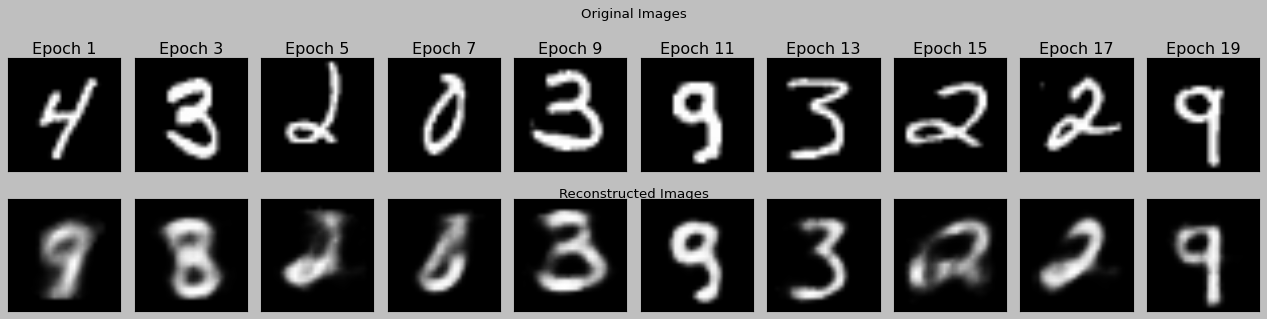

In [39]:
plot_ae_outputs(outputs, n=10, epochs=20)

In [125]:
from torch.utils.data import DataLoader
class AutoEncoder(nn.Module):
    def __init__(self,latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28,512), 
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,self.latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(self.latent_dim,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,784),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x 
    

autoencoder_48 = AutoEncoder(latent_dim=48)

In [126]:
criterion = nn.MSELoss()
lr=1e-3
optimizer = optim.Adam(autoencoder_48.parameters(),lr=lr)
trainloader = DataLoader(train_dataset,shuffle=True,batch_size=128)
losses=[]
final_output=[]
n_epoch=10
#def train(trainloader,criterion,n_epoch,optimizer):
for epoch in range(n_epoch):
    for data,_ in trainloader:
        data = data.view(data.size(0),-1)
        output = autoencoder_48.forward(data)
        loss = criterion(data,output)
        # backprop
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    final_output.append((epoch,data,output))
    print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0375
Epoch [2/10], Loss: 0.0290
Epoch [3/10], Loss: 0.0258
Epoch [4/10], Loss: 0.0236
Epoch [5/10], Loss: 0.0202
Epoch [6/10], Loss: 0.0195
Epoch [7/10], Loss: 0.0195
Epoch [8/10], Loss: 0.0186
Epoch [9/10], Loss: 0.0194
Epoch [10/10], Loss: 0.0180


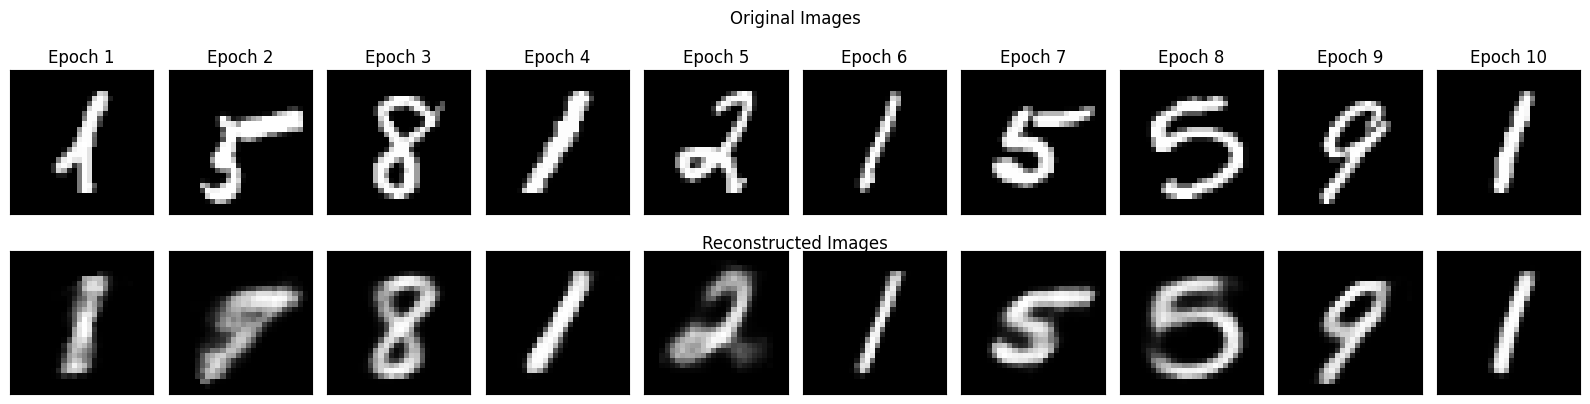

In [127]:
plot_ae_outputs(final_output, n=10, epochs=10)

b. Pick 4 pairs of training samples. In the latent space, interpolate between each pair by taking 5 evenly spaced points along the line connecting their latent representations. Decode these points and display the resulting images. What trends do you notice as you move between samples?

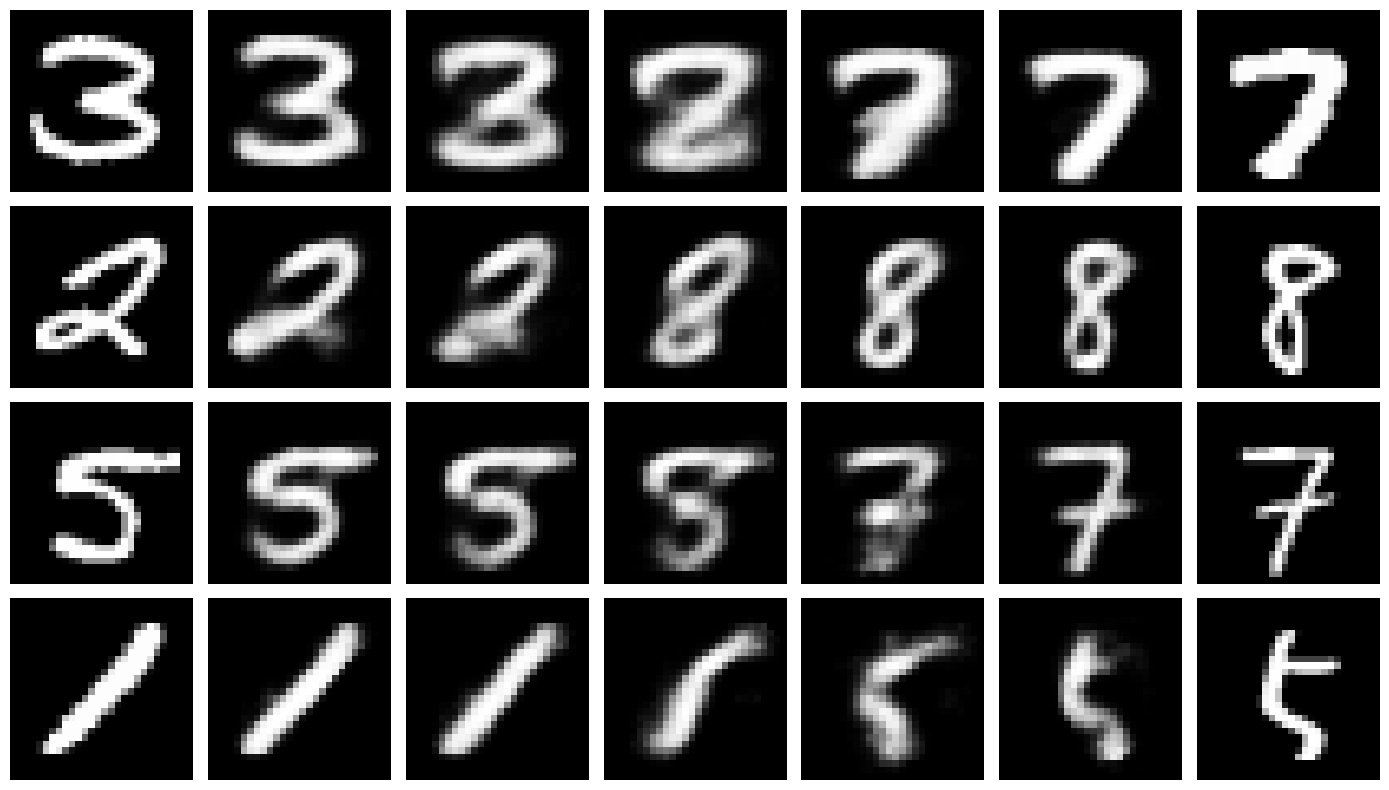

In [129]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training samples
batch_iter = iter(train_loader)
images, _ = next(batch_iter)
images = images.view(images.size(0), -1)

# Select 8 images (4 pairs)
selected_indices = [0, 1, 2, 3, 4, 5, 6, 7]
sample_images = images[selected_indices]

# Get latent representations
with torch.no_grad():
    latents = autoencoder_48.encoder(sample_images)

# Create interpolation points for each pair
results = []
for i in range(0, 8, 2):
    start_latent = latents[i]
    end_latent = latents[i+1]
    
    # Create 5 interpolation points
    alphas = np.linspace(0, 1, 5)
    interpolated_points = []
    
    for alpha in alphas:
        # Linear interpolation: z = (1-α)×z₁ + α×z₂
        interp = (1-alpha) * start_latent + alpha * end_latent
        interpolated_points.append(interp)
    
    # Decode interpolated points
    decoded_images = []
    for point in interpolated_points:
        with torch.no_grad():
            decoded = autoencoder_48.decoder(point.unsqueeze(0)).squeeze(0)
            decoded_images.append(decoded)
    
    results.append({
        'start': sample_images[i],
        'end': sample_images[i+1],
        'interpolations': decoded_images
    })

# Visualize results
fig, axes = plt.subplots(4, 7, figsize=(14, 8))
for i, result in enumerate(results):
    # Display original start image
    start_img = result['start'].view(28, 28).cpu().detach().numpy()
    axes[i, 0].imshow(start_img, cmap='gray')
    axes[i, 0].axis('off')
    
    # Display interpolations
    for j, img in enumerate(result['interpolations']):
        img_np = img.view(28, 28).cpu().detach().numpy()
        axes[i, j+1].imshow(img_np, cmap='gray')
        axes[i, j+1].axis('off')
    
    # Display original end image
    end_img = result['end'].view(28, 28).cpu().detach().numpy()
    axes[i, 6].imshow(end_img, cmap='gray')
    axes[i, 6].axis('off')

plt.tight_layout()
plt.show()


## Variational Autoencoder(VAE): 
Train a Variational Autoencoder (VAE) on the Fashion MNIST dataset to generate new clothing-like images. Design the encoder to output a distribution in a 12-dimensional latent space.

In [ ]:

from torch.nn import init
class Encoder(nn.Module):
    def __init__(self,input,hidden,latent):
        super().__init__()
        self.fc1 = nn.Linear(input,hidden)
        self.logvar = nn.Linear(hidden,latent)
        self.mu = nn.Linear(hidden,latent)
        self.dropout = nn.Dropout(0.3)
        self.bn1= nn.BatchNorm1d(hidden)
        self.initialize_weight()
        
    def initialize_weight(self):
        init.xavier_uniform_(self.fc1.weight)
        init.zeros_(self.fc1.bias)
        
        init.xavier_uniform_(self.logvar.weight)
        init.zeros_(self.logvar.bias)
        
        init.xavier_uniform_(self.mu.weight)
        init.zeros_(self.mu.bias)
    
    def forward(self,x):
        
        h = self.fc1(x)
        h = self.bn1(h)
        h = torch.relu(h)
        h=self.dropout(h)
        logvar = self.logvar(h)
        mu = self.mu(h)
        return logvar,mu
    
class Decoder(nn.Module):
    def __init__(self,latent,hidden,output):
        super().__init__()
        # why is this a 2 layered network, why not 1 or 3?
        self.fc1 = nn.Linear(latent,hidden)
        self.fc2 = nn.Linear(hidden,output)
        self.dropout = nn.Dropout(0.3)
        self.init_weights()
        
    def init_weights(self):
        init.xavier_uniform_(self.fc1.weight)
        init.zeros_(self.fc1.bias)
        
        init.xavier_uniform_(self.fc2.weight)
        init.zeros_(self.fc2.bias)
    
    def forward(self,z):
        h = torch.relu(self.fc1(z))
        h = self.dropout(h)
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat
        
    
class VAE(nn.Module):
    def __init__(self,input,hidden,latent):
        super().__init__()
        self.encoder = Encoder(input,hidden,latent)
        self.decoder = Decoder(latent,hidden,input)
    
    def forward(self,x):
        logvar,mu = self.encoder(x)
        
        #reparamaterization trick
        std=torch.exp(0.5*logvar) 
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)

        return x_hat,mu,logvar
    

In [89]:
def loss_function(x,x_hat,mu,logvar):
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE+KLD

In [ ]:
from torch.utils.data import DataLoader
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images
])

# Load MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)


In [116]:
input=28*28
hidden_dim = 400
latent_dim = 12
lr = 1e-3
num_epochs = 20

variational_autoencoder= VAE(input,hidden_dim,latent_dim)

# define optimizer 
optimizer = optim.Adam(variational_autoencoder.parameters(),lr=lr)

In [ ]:
outputs=[]
for epoch in range(num_epochs):
    variational_autoencoder.train()
    train_loss=0
    for data,_ in train_loader:
        optimizer.zero_grad()
        x_hat,mu,logvar=variational_autoencoder(data)
        loss = loss_function(data,x_hat,mu,logvar)
        loss.backward()
        train_loss+=loss
        optimizer.step()
    outputs.append(loss.item())
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset):.4f}')
    # i have to add a validation logic as well

Epoch 0, Loss: 291.5680
Epoch 1, Loss: 263.1317
Epoch 2, Loss: 258.5377
Epoch 3, Loss: 256.2261
Epoch 4, Loss: 254.8367
Epoch 5, Loss: 253.9533
Epoch 6, Loss: 253.2372
Epoch 7, Loss: 252.6882
Epoch 8, Loss: 252.1624
Epoch 9, Loss: 251.9095
Epoch 10, Loss: 251.4823
Epoch 11, Loss: 251.1984
Epoch 12, Loss: 251.0198
Epoch 13, Loss: 250.7774
Epoch 14, Loss: 250.4859
Epoch 15, Loss: 250.3397
Epoch 16, Loss: 250.2748
Epoch 17, Loss: 250.0685
Epoch 18, Loss: 249.9102
Epoch 19, Loss: 249.8661


b. After training, sample 50 new images from the learned distribution and display them in a grid.Comment on the diversity and quality of the generated samples—are they recognizable as Fashion
MNIST items? 

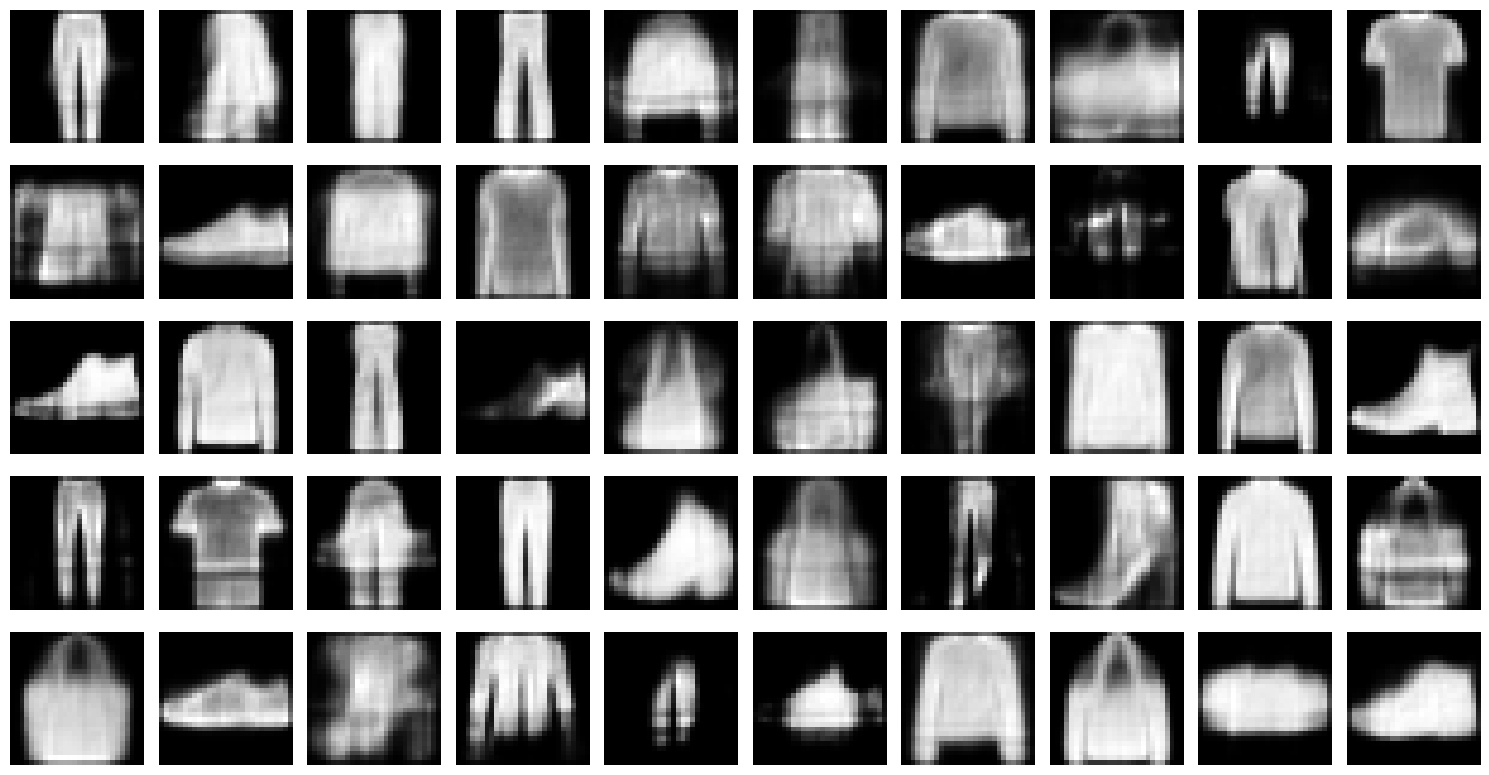

In [ ]:
import torch
import matplotlib.pyplot as plt

variational_autoencoder.eval()
with torch.no_grad():
    z = torch.randn(50, 12)  # 50 samples from 12D standard normal
    samples = variational_autoencoder.decoder(z).cpu().numpy()
    samples = samples.reshape(-1, 28, 28)

fig, axes = plt.subplots(5, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Diversity and quality of the generated samples
- **diversity** : with well trained VAE and a 12D latent space, the generated images covers all the MNIST categories images e.g (shirts,trousers,shoes,purse,etc) however these are of low dimensions and shows variations in shape and style.
  
- **quality** : the images are of low-dimensional because of the decoding done but is recognizable as clothing item. However some, samples are ambiguous or less sharp, it is a known limitation of basic VAEs.

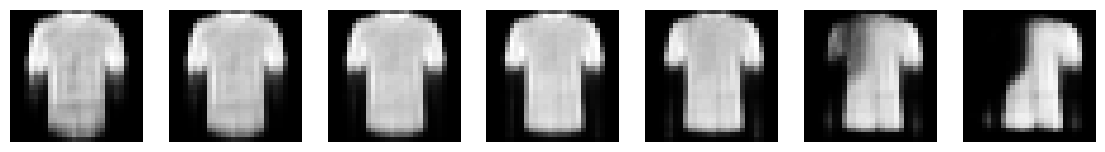

In [ ]:
#latent code visualization
z = torch.randn(1, 12)
fig, axes = plt.subplots(1, 7, figsize=(14, 2))
for i, val in enumerate(torch.linspace(-3, 3, 7)):
    z_mod = z.clone()
    z_mod[0, 0] = val  # tweak first latent dim
    sample = variational_autoencoder.decoder(z_mod).cpu().detach().numpy().reshape(28, 28)
    axes[i].imshow(sample, cmap='gray')
    axes[i].axis('off')
plt.show()


## Latent Variable Manipulation
- **tweak** : systematically vary one dimension ex, from -3 to +3 and decode each modified vector
- **effect** : from the image we can see it is morphed smoothly, VAE has learned disentangled representations to some extent.
  - A latent dimension can control certain generative factors(e.g sleeve length, shoe thickness, etc)